In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

## Task1

빈 칸을 채워주세요!

단계별 output이 github 파일에는 남아있으니 그 output과 동일한 형태인지 확인하면서 진행해주시면 됩니다~

In [122]:
#1. 생성할 문장 데이터

sentence = ("Brick walls are there for a reason and you must not think "
            "that the brick walls aren't there to keep us out, but rather "
            "in this way that the brick walls are there to show us how badly we want things.")

In [123]:
len(sentence)

198

In [77]:
#2. 문자 집합 만들기
world_set = list(set(sentence))

In [78]:
world_set

['B',
 'l',
 't',
 'f',
 'u',
 'g',
 ' ',
 'd',
 'c',
 'y',
 '.',
 ',',
 'b',
 'k',
 'e',
 "'",
 'h',
 'm',
 'o',
 'w',
 'a',
 'i',
 'n',
 'p',
 'r',
 's']

In [79]:
## 문제(1): 각 문자에 정수 인코딩 (공백도 하나의 원소로 포함)
vocab = {word: num for num, word in enumerate(world_set)}

In [80]:
print(vocab)

{'B': 0, 'l': 1, 't': 2, 'f': 3, 'u': 4, 'g': 5, ' ': 6, 'd': 7, 'c': 8, 'y': 9, '.': 10, ',': 11, 'b': 12, 'k': 13, 'e': 14, "'": 15, 'h': 16, 'm': 17, 'o': 18, 'w': 19, 'a': 20, 'i': 21, 'n': 22, 'p': 23, 'r': 24, 's': 25}


In [81]:
#3. 문자 집합 크기 확인

vocab_size = len(vocab) 
print('문자 집합 크기 : {}'.format(vocab_size))

문자 집합 크기 : 26


In [82]:
#4. 하이퍼 파라미터 설정(자유롭게 수정해보세요!)

hidden_size = vocab_size # 같아야 하는 것 확인! # =26
sequence_length = 10  # 너무 길거나 너무 짧게 잡으면 안됩니다!
learning_rate = 0.01

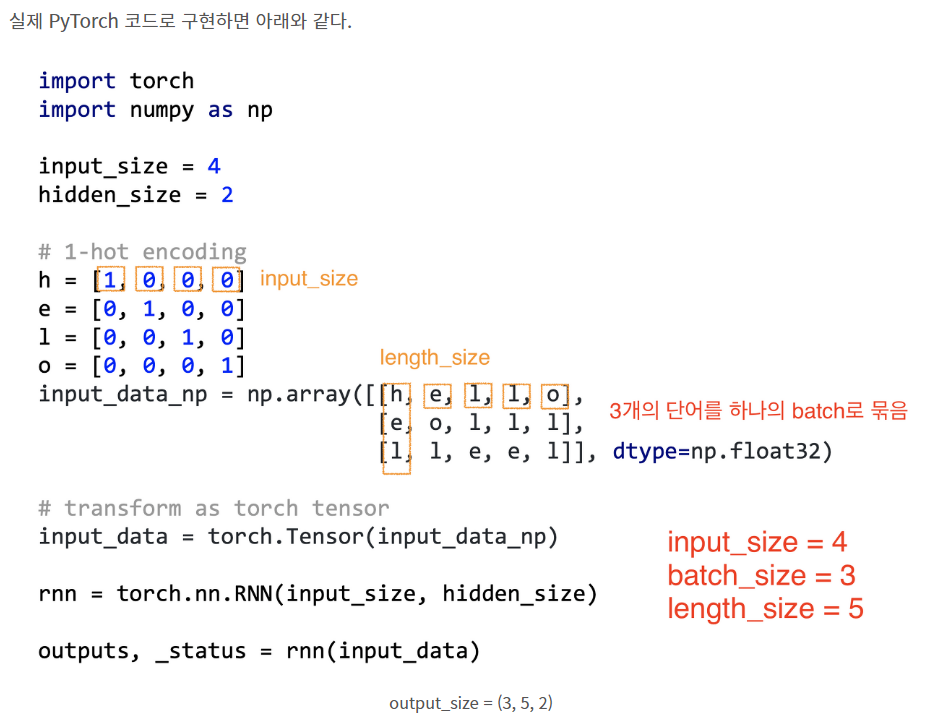

In [83]:
#5. seqence 길이 단위 자르기

# 데이터 구성을 위한 리스트
x_data = []
y_data = []

## 문제(2): 반복문 내에서의 인덱싱을 사용하여 sequence_length 값 단위로 샘플을 잘라 데이터 만들기, y_str은 x_str은 한 칸씩 쉬프트된 sequnce

for i in range(0, len(sentence) - sequence_length):
  x_str = sentence[i: i + sequence_length]
  y_str = sentence[i+1: i + sequence_length+1]
  print(i, x_str, "->", y_str)

  # x_str과 y_str이 문자집합에 해당하는 인덱스를 각각 x_data, y_data에 append
  x_data.append([vocab[c] for c in x_str])
  y_data.append([vocab[d] for d in y_str])

0 Brick wall -> rick walls
1 rick walls -> ick walls 
2 ick walls  -> ck walls a
3 ck walls a -> k walls ar
4 k walls ar ->  walls are
5  walls are -> walls are 
6 walls are  -> alls are t
7 alls are t -> lls are th
8 lls are th -> ls are the
9 ls are the -> s are ther
10 s are ther ->  are there
11  are there -> are there 
12 are there  -> re there f
13 re there f -> e there fo
14 e there fo ->  there for
15  there for -> there for 
16 there for  -> here for a
17 here for a -> ere for a 
18 ere for a  -> re for a r
19 re for a r -> e for a re
20 e for a re ->  for a rea
21  for a rea -> for a reas
22 for a reas -> or a reaso
23 or a reaso -> r a reason
24 r a reason ->  a reason 
25  a reason  -> a reason a
26 a reason a ->  reason an
27  reason an -> reason and
28 reason and -> eason and 
29 eason and  -> ason and y
30 ason and y -> son and yo
31 son and yo -> on and you
32 on and you -> n and you 
33 n and you  ->  and you m
34  and you m -> and you mu
35 and you mu -> nd you mus
36

In [84]:
# 출력해서 한 칸씩 쉬프트된 것 확인하기!

print(x_data[0])
print(y_data[0])

[0, 24, 21, 8, 13, 6, 19, 20, 1, 1]
[24, 21, 8, 13, 6, 19, 20, 1, 1, 25]


In [85]:
##6. 입력 시퀀스에 대해 원핫인코딩 수행

## 문제(4) : x_data를 원핫인코딩 > numpy의 eye를 쓸 수 있지 않을까?
x_one_hot = [np.eye(len(vocab))[x] for x in x_data]  #numpy.eye(n) : n*n 대각행렬 만들기기

##7. 입력 데이터, 레이블데이터 텐서로 변환

## 문제(5) : x_one_hot과 y_data 텐서로 변환 : 둘 다 같은 형식의 텐서로 변환하면 될까?? (FloatTensor, LongTesor 중 맞는 것은?)
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [86]:
np.shape(x_one_hot)

(188, 10, 26)

In [87]:
x_one_hot[0]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 

In [88]:
x_one_hot[1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 

CrossEntropyLoss(input, target) takes **LongTensor targets** and **FloatTensor inputs**

[링크 텍스트](https://discuss.pytorch.org/t/why-pytorch-is-giving-me-hard-time-with-float-long-double-tensor/14678)

In [89]:
##8. 크기 확인
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([188, 10, 26])
레이블의 크기 : torch.Size([188, 10])


In [90]:
##9.원핫인코딩 결과 샘플 확인하기
print(X[0])

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1.,

In [91]:
##10. 레이블 데이터 샘플 확인하기
print(Y[0])

tensor([24, 21,  8, 13,  6, 19, 20,  1,  1, 25])


In [104]:
##11. RNN 모델 구현

##문제(6) : 기본 pytorch 인자 넣기 연습 + forward 채우기
### 조건 : rnn layer 2개 쌓기 + 마지막은 fc layer
### batch_fisrt 설정 필요할까? (유튜브 강의 참고)

class Net(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, layers):
    super(Net, self).__init__()
    self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers = layers, batch_first = True)
    self.fc = torch.nn.Linear(hidden_dim, input_dim)

  def forward(self, x):
    rnn_out, hidden = self.rnn(x)
    rnn_out, hidden = self.rnn(rnn_out, hidden)
    x = self.fc(rnn_out)
    return x

In [105]:
net = Net(vocab_size, hidden_size, 2)

In [106]:
##12. loss function
criterion = torch.nn.CrossEntropyLoss()

##13. optimizer
optimizer = optim.Adam(net.parameters(), learning_rate)

In [107]:
##14. 출력 크기 점검
outputs = net(X)
print(outputs.shape)

torch.Size([188, 10, 26])


In [108]:
##15. Training 시작

for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    ##문제(7) : outputs, Y 형태 그대로 넣으면 안되죠. view 함수를 이용해 loss값을 계산해봅시다.
    loss = criterion(outputs.view(-1, vocab_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    #16. 예측결과 확인
    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        if j == 0: # 처음에는 예측 결과를 전부 가져오기
            predict_str += ''.join([world_set[t] for t in result])
        else: # 그 다음에는 마지막 글자만 반복 추가
            predict_str += world_set[result[-1]]

    print(predict_str)

otttttttttttttttttttttttttttttttttttttftttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttttt
ooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
rrroooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
rrr                                                                                                                                                                                                  
r                                                                                                                                                                                                    
          

In [109]:
predict_str

'rick walls are there tor a reason and you must not think that the brick walls are tt there to keep us out, bat rather in this way that the brick walls are there to khow us how badly we want thengsl'

결과가 어떤가요?? 마지막 에폭의 문장이 그럴싸한가요?

## Task2

위 sentence는 제가 임의로 생성한 문장들입니다.

마음에 드시는 문구 가져오셔서 문장이 어떻게 생성되는지 확인해보세요! 

영어가 아닌 한국어로 시도해보는 것도 좋겠죠? 

수정이 많이 필요(토큰화 등) 할 수 있으나 한번 시도해보시는 것 권장드립니다 :)

위 베이스라인은 어디든 수정하셔도 좋고 조금 더 자연스러운 문장이 나올 수 있게 다양한 시도를 해보세요!

조건 : 문장 3개 이상, 연결성이 있는 문장을 " " 으로 구분하여 ( )에 넣기

In [24]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 45.3 MB/s eta 0:00:00


In [219]:
sentence = ("머리가 깨질 것 같이 잠에서 일어나 악몽을 꾼 것 같은데 "
            "나를 둘러싼 사람들 고장 나버린 내 몸을 두고 "
            "저 돌팔이 의사가 사망 선고를 하네 "
            "이렇게 죽을 순 없어 버킷리스트 다 해봐야 해 "
            "짧은 인생 쥐뿔도 없는 게 스쳐 가네 파노라마처럼 ")

In [220]:
from konlpy.tag import Okt
tokenizer = Okt()
tok = tokenizer.morphs(sentence)
tok

['머리',
 '가',
 '깨질',
 '것',
 '같이',
 '잠',
 '에서',
 '일어나',
 '악몽',
 '을',
 '꾼',
 '것',
 '같은데',
 '나를',
 '둘러싼',
 '사람',
 '들',
 '고장',
 '나',
 '버린',
 '내',
 '몸',
 '을',
 '두고',
 '저',
 '돌',
 '팔이',
 '의사',
 '가',
 '사망',
 '선고',
 '를',
 '하네',
 '이렇게',
 '죽',
 '을',
 '순',
 '없어',
 '버킷리스트',
 '다',
 '해봐야',
 '해',
 '짧은',
 '인생',
 '쥐뿔',
 '도',
 '없는',
 '게',
 '스쳐',
 '가네',
 '파노라마',
 '처럼']

In [221]:
tok1 = list(set(tok))
tok1

['도',
 '깨질',
 '쥐뿔',
 '인생',
 '의사',
 '이렇게',
 '해',
 '고장',
 '두고',
 '돌',
 '둘러싼',
 '가',
 '같은데',
 '몸',
 '악몽',
 '들',
 '버킷리스트',
 '처럼',
 '나를',
 '짧은',
 '가네',
 '를',
 '일어나',
 '꾼',
 '내',
 '게',
 '같이',
 '저',
 '없어',
 '없는',
 '다',
 '것',
 '나',
 '을',
 '팔이',
 '에서',
 '머리',
 '해봐야',
 '사망',
 '스쳐',
 '순',
 '사람',
 '죽',
 '파노라마',
 '버린',
 '선고',
 '하네',
 '잠']

In [222]:
vocab = {c: i for i, c in enumerate(tok1)}

In [223]:
print(vocab)

{'도': 0, '깨질': 1, '쥐뿔': 2, '인생': 3, '의사': 4, '이렇게': 5, '해': 6, '고장': 7, '두고': 8, '돌': 9, '둘러싼': 10, '가': 11, '같은데': 12, '몸': 13, '악몽': 14, '들': 15, '버킷리스트': 16, '처럼': 17, '나를': 18, '짧은': 19, '가네': 20, '를': 21, '일어나': 22, '꾼': 23, '내': 24, '게': 25, '같이': 26, '저': 27, '없어': 28, '없는': 29, '다': 30, '것': 31, '나': 32, '을': 33, '팔이': 34, '에서': 35, '머리': 36, '해봐야': 37, '사망': 38, '스쳐': 39, '순': 40, '사람': 41, '죽': 42, '파노라마': 43, '버린': 44, '선고': 45, '하네': 46, '잠': 47}


In [224]:
#3. 문자 집합 크기 확인

vocab_size = len(vocab)
print('문자 집합 크기 : {}'.format(vocab_size))

문자 집합 크기 : 48


In [225]:
#4. 하이퍼 파라미터 설정(자유롭게 수정해보세요!)

hidden_size = vocab_size # 같아야 하는 것 확인!
sequence_length = 6  # 너무 길거나 너무 짧게 잡으면 안됩니다!
learning_rate = 0.1

In [226]:
#5. seqence 길이 단위 자르기

# 데이터 구성을 위한 리스트
x_data = []
y_data = []

## 문제(2): 반복문 내에서의 인덱싱을 사용하여 sequence_length 값 단위로 샘플을 잘라 데이터 만들기, y_str은 x_str은 한 칸씩 쉬프트된 sequnce

for i in range(0, len(tok) - sequence_length):
  x_str = tok[i:i+sequence_length]
  y_str = tok[i+1:i+sequence_length+1]
  print(i, x_str, "->", y_str)

  # x_str과 y_str이 문자집합에 해당하는 인덱스를 각각 x_data, y_data에 append
  x_data.append([vocab[c] for c in x_str])
  y_data.append([vocab[d] for d in y_str])

0 ['머리', '가', '깨질', '것', '같이', '잠'] -> ['가', '깨질', '것', '같이', '잠', '에서']
1 ['가', '깨질', '것', '같이', '잠', '에서'] -> ['깨질', '것', '같이', '잠', '에서', '일어나']
2 ['깨질', '것', '같이', '잠', '에서', '일어나'] -> ['것', '같이', '잠', '에서', '일어나', '악몽']
3 ['것', '같이', '잠', '에서', '일어나', '악몽'] -> ['같이', '잠', '에서', '일어나', '악몽', '을']
4 ['같이', '잠', '에서', '일어나', '악몽', '을'] -> ['잠', '에서', '일어나', '악몽', '을', '꾼']
5 ['잠', '에서', '일어나', '악몽', '을', '꾼'] -> ['에서', '일어나', '악몽', '을', '꾼', '것']
6 ['에서', '일어나', '악몽', '을', '꾼', '것'] -> ['일어나', '악몽', '을', '꾼', '것', '같은데']
7 ['일어나', '악몽', '을', '꾼', '것', '같은데'] -> ['악몽', '을', '꾼', '것', '같은데', '나를']
8 ['악몽', '을', '꾼', '것', '같은데', '나를'] -> ['을', '꾼', '것', '같은데', '나를', '둘러싼']
9 ['을', '꾼', '것', '같은데', '나를', '둘러싼'] -> ['꾼', '것', '같은데', '나를', '둘러싼', '사람']
10 ['꾼', '것', '같은데', '나를', '둘러싼', '사람'] -> ['것', '같은데', '나를', '둘러싼', '사람', '들']
11 ['것', '같은데', '나를', '둘러싼', '사람', '들'] -> ['같은데', '나를', '둘러싼', '사람', '들', '고장']
12 ['같은데', '나를', '둘러싼', '사람', '들', '고장'] -> ['나를', '둘러싼', '사람', '들', '고장', '나']


In [227]:
# 출력해서 한 칸씩 쉬프트된 것 확인하기!

print(x_data[0])
print(y_data[0])

[36, 11, 1, 31, 26, 47]
[11, 1, 31, 26, 47, 35]


In [228]:
##6. 입력 시퀀스에 대해 원핫인코딩 수행

## 문제(4) : x_data를 원핫인코딩 > numpy의 eye를 쓸 수 있지 않을까?
x_one_hot = [np.eye(len(vocab))[x] for x in x_data]

##7. 입력 데이터, 레이블데이터 텐서로 변환

## 문제(5) : x_one_hot과 y_data 텐서로 변환 : 둘 다 같은 형식의 텐서로 변환하면 될까?? (FloatTensor, LongTesor 중 맞는 것은?)
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [229]:
##8. 크기 확인
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))
     

훈련 데이터의 크기 : torch.Size([46, 6, 48])
레이블의 크기 : torch.Size([46, 6])


In [230]:
##10. 레이블 데이터 샘플 확인하기
print(Y[0])

tensor([11,  1, 31, 26, 47, 35])


In [231]:
##11. RNN 모델 구현

##문제(6) : 기본 pytorch 인자 넣기 연습 + forward 채우기
### 조건 : rnn layer 2개 쌓기 + 마지막은 fc layer
### batch_fisrt 설정 필요할까? (유튜브 강의 참고)

class Net(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, layers):
    super(Net, self).__init__()
    self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers=layers, batch_first=True)
    self.fc = torch.nn.Linear(hidden_dim, input_dim)
  
  def forward(self, x):
    rnn_out, hidden = self.rnn(x)
    x= self.fc(rnn_out)
    return x

In [232]:
net = Net(vocab_size, hidden_size, 2)
##12. loss function
criterion = torch.nn.CrossEntropyLoss()

##13. optimizer
optimizer = optim.Adam(net.parameters(), learning_rate)

In [233]:
##14. 출력 크기 점검
outputs = net(X)
print(outputs.shape)

torch.Size([46, 6, 48])


In [238]:

##15. Training 시작

for i in range(200):
    optimizer.zero_grad()
    outputs = net(X)
    ##문제(7) : outputs, Y 형태 그대로 넣으면 안되죠. view 함수를 이용해 loss값을 계산해봅시다.
    loss = criterion(outputs.view(-1, vocab_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    #16. 예측결과 확인
    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        if j == 0: # 처음에는 예측 결과를 전부 가져오기
            predict_str = predict_str + ' '.join([world_set[t] for t in result]) +' '
        else: # 그 다음에는 마지막 글자만 반복 추가
            predict_str = predict_str +  world_set[result[-1]] + ' '

2차시도)

In [239]:
predict_str

'가 깨질 것 같이 잠 에서 일어나 악몽 을 꾼 것 같은데 나를 둘러싼 사람 들 고장 나 버린 내 몸 을 두고 저 돌 팔이 의사 가 사망 선고 를 하네 이렇게 죽 을 순 없어 버킷리스트 다 해봐야 해 짧은 인생 쥐뿔 도 없는 게 스쳐 가네 파노라마 처럼 '

1차시도)

In [235]:
predict_str

'가깨질것같이잠에서일어나악몽을꾼것같은데나를둘러싼사람들고장나버린내몸을두고저돌팔이의사가사망선고를하네이렇게죽을순없어버킷리스트다해봐야해짧은인생쥐뿔도없는게스쳐가네파노라마처럼'

ㅜㅜ  일어날게유


#### 참고

In [206]:
##9.원핫인코딩 결과 샘플 확인하기
print(X[0])

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
vocab_size = len(vocab)

In [155]:
print('문자 집합 크기 : {}'.format(vocab_size))

문자 집합 크기 : 48


In [31]:
index2word = {v: k for k, v in word2index.items()}
print(index2word)

{0: '도', 1: '깨질', 2: '쥐뿔', 3: '인생', 4: '의사', 5: '이렇게', 6: '해', 7: '고장', 8: '두고', 9: '돌', 10: '둘러싼', 11: '가', 12: '같은데', 13: '몸', 14: '악몽', 15: '들', 16: '버킷리스트', 17: '처럼', 18: '나를', 19: '짧은', 20: '가네', 21: '를', 22: '일어나', 23: '꾼', 24: '내', 25: '게', 26: '같이', 27: '저', 28: '없어', 29: '없는', 30: '다', 31: '것', 32: '나', 33: '을', 34: '팔이', 35: '에서', 36: '머리', 37: '해봐야', 38: '사망', 39: '스쳐', 40: '순', 41: '사람', 42: '죽', 43: '파노라마', 44: '버린', 45: '선고', 46: '하네', 47: '잠'}


In [33]:
def build_data(word, word2index):
    encoded = [word2index[token] for token in word]  
    input_seq, label_seq = encoded[:-1], encoded[1:] 
    input_seq = torch.LongTensor(input_seq).unsqueeze(0)
    label_seq = torch.LongTensor(label_seq).unsqueeze(0) 
    return input_seq, label_seq

In [34]:
X, Y = build_data(word, word2index)

In [36]:
print(X)
print(Y)

tensor([[36, 11,  1, 31, 26, 47, 35, 22, 14, 33, 23, 31, 12, 18, 10, 41, 15,  7,
         32, 44, 24, 13, 33,  8, 27,  9, 34,  4, 11, 38, 45, 21, 46,  5, 42, 33,
         40, 28, 16, 30, 37,  6, 19,  3,  2,  0, 29, 25, 39, 20, 43]])
tensor([[11,  1, 31, 26, 47, 35, 22, 14, 33, 23, 31, 12, 18, 10, 41, 15,  7, 32,
         44, 24, 13, 33,  8, 27,  9, 34,  4, 11, 38, 45, 21, 46,  5, 42, 33, 40,
         28, 16, 30, 37,  6, 19,  3,  2,  0, 29, 25, 39, 20, 43, 17]])


In [37]:
class Net(nn.Module):
    def __init__(self, vocab_size, input_size, hidden_size, batch_first=True):
        super(Net, self).__init__()
        self.embedding_layer = nn.Embedding(num_embeddings=vocab_size, 
                                            embedding_dim=input_size)
        self.rnn_layer = nn.RNN(input_size, hidden_size, 
                                batch_first=batch_first)
        self.linear = nn.Linear(hidden_size, vocab_size) 

    def forward(self, x):
        output = self.embedding_layer(x)
        output, hidden = self.rnn_layer(output)
        output = self.linear(output)
        return output.view(-1, output.size(2))

In [38]:
vocab_size = len(word2index)  
input_size = 5  
hidden_size = 20  

In [39]:
model = Net(vocab_size, input_size, hidden_size, batch_first=True)
loss_function = nn.CrossEntropyLoss() 
optimizer = optim.Adam(params=model.parameters())

In [40]:
output = model(X)
print(output)

tensor([[-0.0859, -0.1996,  0.1208,  ...,  0.0301, -0.0924, -0.4103],
        [-0.0472, -0.4616, -0.1328,  ..., -0.0172,  0.0017, -0.0918],
        [-0.2310, -0.5606, -0.2051,  ..., -0.0029, -0.0025, -0.4780],
        ...,
        [-0.0504, -0.0877,  0.2116,  ..., -0.1160, -0.1601, -0.4679],
        [ 0.0504, -0.4454,  0.3347,  ..., -0.0036, -0.2423, -0.0293],
        [-0.0881, -0.5690, -0.3625,  ...,  0.0354, -0.3054,  0.1940]],
       grad_fn=<ViewBackward0>)


In [41]:
decode = lambda y: [index2word.get(x) for x in y]

In [42]:
for step in range(201):
    optimizer.zero_grad()
    output = model(X)
    loss = loss_function(output, Y.view(-1))
    loss.backward()
    optimizer.step()
    if step % 40 == 0:
        print("[{:02d}/201] {:.4f} ".format(step+1, loss))
        pred = output.softmax(-1).argmax(-1).tolist()
        print(" ".join(["Repeat"] + decode(pred)))
        print()

[01/201] 3.9591 
Repeat 버킷리스트 가네 나 나 들 죽 인생 일어나 죽 가네 없어 가네 들 가네 인생 가네 같은데 일어나 버킷리스트 없어 가네 들 버킷리스트 같은데 일어나 일어나 를 일어나 버킷리스트 같은데 일어나 없어 가네 없어 죽 버킷리스트 인생 없어 없어 없어 인생 죽 죽 가네 해봐야 없어 나 해봐야 해봐야 가네 없어

[41/201] 3.5915 
Repeat 가 팔이 것 나 버킷리스트 돌 인생 돌 순 가네 버킷리스트 가네 나를 돌 버킷리스트 들 고장 돌 버킷리스트 가네 나 들 것 나를 돌 팔이 나를 돌 팔이 나를 없는 인생 스쳐 죽 죽 것 것 버킷리스트 죽 죽 인생 죽 죽 가네 나를 없는 팔이 스쳐 없는 쥐뿔 같은데

[81/201] 3.0494 
Repeat 가 팔이 나를 돌 잠 나를 일어나 악몽 고장 가네 버킷리스트 같은데 나를 둘러싼 버린 들 고장 가네 을 내 나 들 것 나를 돌 팔이 나를 돌 잠 나를 없는 인생 스쳐 죽 을 순 둘러싼 버킷리스트 을 쥐뿔 나를 죽 을 쥐뿔 스쳐 없는 팔이 스쳐 없는 을 처럼

[121/201] 2.4809 
Repeat 가 팔이 것 돌 잠 에서 일어나 악몽 을 꾼 버킷리스트 같은데 나를 둘러싼 버린 들 고장 둘러싼 버린 내 몸 을 두고 나를 돌 팔이 나를 둘러싼 잠 나를 죽 을 이렇게 죽 을 순 둘러싼 버킷리스트 다 쥐뿔 해 짧은 을 쥐뿔 스쳐 없는 팔이 스쳐 없는 을 처럼

[161/201] 1.9392 
Repeat 가 깨질 것 돌 잠 에서 일어나 악몽 을 꾼 버킷리스트 같은데 나를 둘러싼 버린 들 고장 가네 버린 내 몸 을 두고 저 돌 팔이 의사 둘러싼 사망 선고 죽 을 이렇게 죽 을 순 없어 버킷리스트 다 해봐야 해 짧은 을 쥐뿔 도 없는 게 스쳐 없는 을 처럼

[201/201] 1.4433 
Repeat 가 깨질 것 같이 잠 에서 일어나 악몽 을 꾼 것 같은데 나를 둘러싼 사람 들 고장 나 버린 내 몸 을 두고 저 돌 팔이 의사 둘러싼 사망 선고 죽 하네 이렇게 죽 을 순 없어 버킷리

# task1 method

In [148]:
#2. 문자 집합 만들기
world_set = list(set(sentence))

## 문제(1): 각 문자에 정수 인코딩 (공백도 하나의 원소로 포함)
vocab = {char: idx for idx, char in enumerate(world_set)}

In [149]:
world_set

['둘',
 '도',
 '는',
 '서',
 '악',
 '스',
 '이',
 '에',
 '의',
 '야',
 ' ',
 '같',
 '쥐',
 '봐',
 '해',
 '돌',
 '가',
 '망',
 '럼',
 '몸',
 '선',
 '없',
 '쳐',
 '네',
 '질',
 '들',
 '파',
 '린',
 '노',
 '고',
 '뿔',
 '팔',
 '를',
 '버',
 '내',
 '꾼',
 '하',
 '러',
 '일',
 '게',
 '몽',
 '저',
 '렇',
 '트',
 '짧',
 '생',
 '리',
 '다',
 '인',
 '것',
 '킷',
 '라',
 '나',
 '처',
 '을',
 '은',
 '두',
 '싼',
 '순',
 '죽',
 '어',
 '마',
 '데',
 '장',
 '깨',
 '사',
 '람',
 '머',
 '잠']

In [136]:
print(vocab)


#3. 문자 집합 크기 확인
vocab_size = len(vocab)
print('문자 집합 크기 : {}'.format(vocab_size))

['도', '깨질', '쥐뿔', '인생', '의사', '이렇게', '해', '고장', '두고', '돌', '둘러싼', '가', '같은데', '몸', '악몽', '들', '버킷리스트', '처럼', '나를', '짧은', '가네', '를', '일어나', '꾼', '내', '게', '같이', '저', '없어', '없는', '다', '것', '나', '을', '팔이', '에서', '머리', '해봐야', '사망', '스쳐', '순', '사람', '죽', '파노라마', '버린', '선고', '하네', '잠']
문자 집합 크기 : 48


In [156]:
hidden_size = vocab_size 
sequence_length = 10
learning_rate = 0.01

In [157]:
x_data = []
y_data = []

for i in range(0, len(vocab) - sequence_length):
  x_str = vocab[i:i+sequence_length]
  y_str = vocab[i+1:i+sequence_length+1]
  print(i, x_str, "->", y_str)

  x_data.append([word2index[c] for c in x_str])
  y_data.append([word2index[d] for d in y_str])

TypeError: ignored

In [45]:
print(x_data[0])
print(y_data[0])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [46]:
x_data

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
 [13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
 [14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
 [15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
 [16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
 [17, 18, 19, 20, 21, 22, 23, 24, 25, 26],
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
 [19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 [21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
 [22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
 [23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 [24, 25, 26, 27, 28, 2

In [47]:
x_one_hot = [np.eye(vocab_size)[x] for x in x_data]

X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

In [48]:
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([38, 10, 48])
레이블의 크기 : torch.Size([38, 10])


In [49]:
print(X[0])

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.

In [50]:
print(Y[0])

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])


In [51]:
class Net(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, layers):
    super(Net, self).__init__()
    self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers = layers, batch_first = True)
    self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias=True)
  
  def forward(self, x):
    x, _status = self.rnn(x)
    x = self.fc(x)
    return x

In [52]:
net = Net(vocab_size, hidden_size, 2)

In [53]:
criterion = torch.nn.CrossEntropyLoss()

optimizer = optim.Adam(net.parameters(), learning_rate)

In [54]:
outputs = net(X)
print(outputs.shape)

torch.Size([38, 10, 48])


In [55]:
for i in range(100):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, vocab_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        if j == 0: 
            predict_str += ''.join([vocab[t] for t in result])
        else: 
            predict_str += vocab[result[-1]]

    print(predict_str)

게게들게게게들게게게들들게게들게게게게게들게게게들게게게게게게들들게게게게게들게게게들들게게게
같은데같은데같은데버킷리스트같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데같은데
같은데버킷리스트같은데버킷리스트같은데같은데같은데같은데처럼같은데버킷리스트같은데버킷리스트같은데같은데버킷리스트처럼같은데같은데같은데같은데같은데버킷리스트같은데팔이같이같은데버킷리스트같은데같은데버킷리스트같은데같은데팔이같은데같은데같은데같은데같은데처럼같은데같은데같은데같은데버킷리스트같은데팔이
을처럼같은데버킷리스트에서에서같은데같은데처럼둘러싼가같은데몸팔이들버킷리스트처럼나를짧은가네를일어나팔이같은데팔이같이저버킷리스트없는같은데것나을팔이에서에서에서저에서처럼같은데가팔이같은데버킷리스트같은데처럼
을처럼같은데에서에서에서저것돌둘러싼가같은데몸악몽들버킷리스트처럼나를짧은가네를가네꾼내게같이저없어없는다것저을팔이에서머리해봐야저스쳐없는같은데가에서내팔이같이저
가네처럼머리몸머리같이저것돌둘러싼가같은데몸악몽들버킷리스트처럼둘러싼짧은가네를돌둘러싼짧은게같이저없어없는다것나스쳐팔이에서머리해봐야저스쳐없는사람가파노라마내게같이저
가네없어같이사망머리같이저없어없는둘러싼가같은데몸악몽들버킷리스트처럼둘러싼짧은가네를돌둘러싼내게같이저없어없는다것저스쳐팔이에서머리같이저스쳐없는사람가파노라마내게같이저
가네처럼같이사망머리같이저둘러싼돌둘러싼가같은데몸악몽들버킷리스트처럼둘러싼짧은가네를일어나꾼내게같이저없어없는다것나을팔이에서머리같이저스쳐없는사람가없는사람게같이저
가네없어같이사망머리해저둘러싼돌둘러싼가같은데몸악몽들버킷리스트처럼둘러싼짧은가네를일어나꾼내게같이저없어없는다것나을팔이에서머리해봐야저스쳐없는사람죽파노라마사람게같이저
을머리에서사망머리해저두고돌둘러싼가같은데몸악몽들버킷리스트처럼둘러싼짧은가네를일어나꾼내게같이저없어없는다것나을팔이에서머리해봐야사망스쳐없는사람죽파노라마사람게같이저
을머리에서사망이렇게해고장두고돌둘러싼가같은데몸악몽들버킷리스트처럼

In [56]:
predict_str

'깨질쥐뿔인생의사이렇게해고장두고돌둘러싼가같은데몸악몽들버킷리스트처럼나를짧은가네를일어나꾼내게같이저없어없는다것나을팔이에서머리해봐야사망스쳐순사람죽파노라마버린선고하네잠'